Importing packages and initialization of data set arrays

In [1]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

sns.set()

asocial_values = np.linspace(0.0, 1.0, num= 11)
roaddensities = np.arange(10, 210, 10)

Importing data sets from csv

In [2]:
data = {}

for density in roaddensities:
    data[density] = {}
    
    for j, asocialness in enumerate(asocial_values):
        data[density][asocialness] = pd.read_csv('output_%sasocial%s, 10000points.csv' % (density, asocialness))
        

Plotting Travel time per case

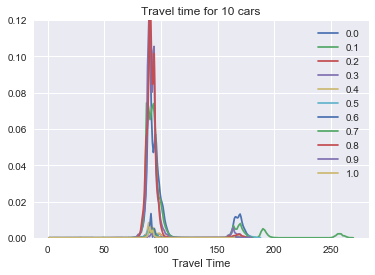

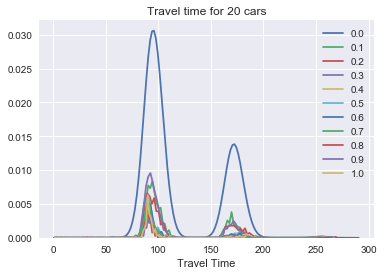

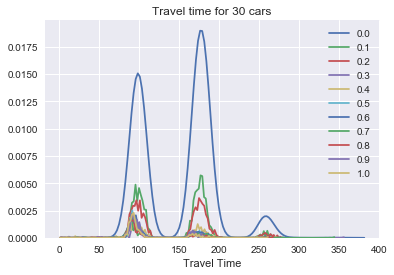

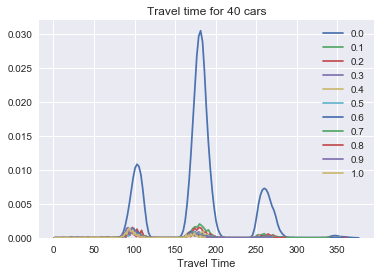

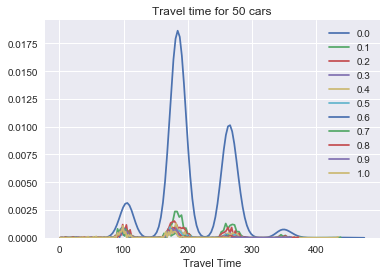

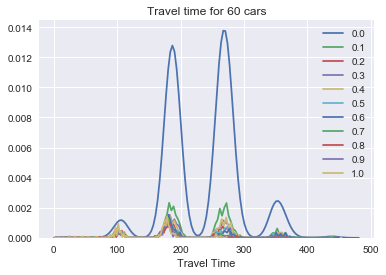

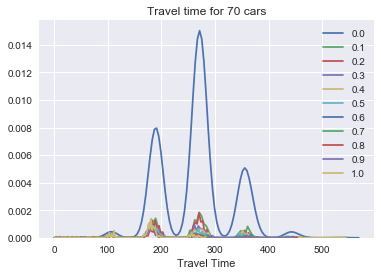

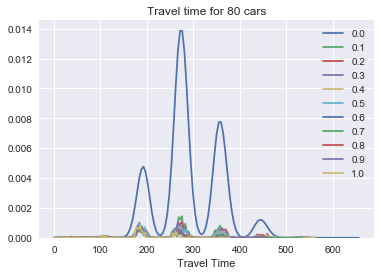

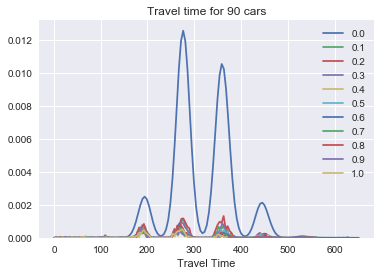

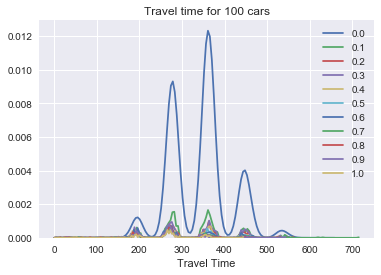

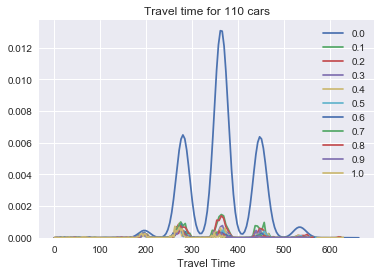

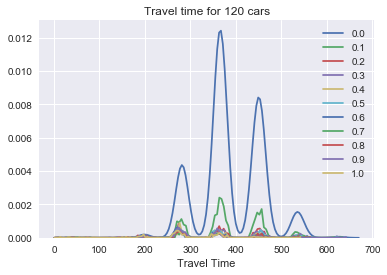

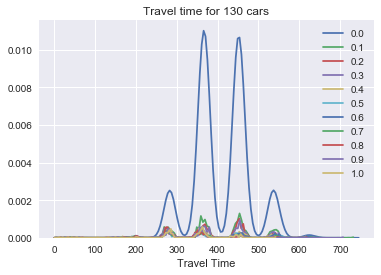

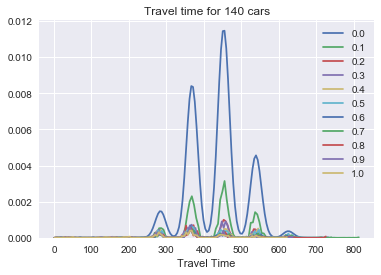

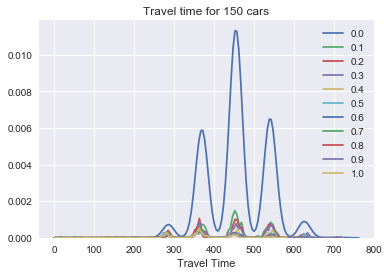

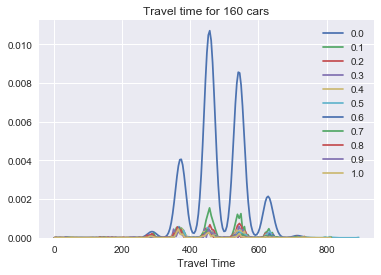

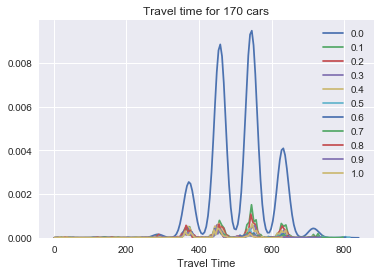

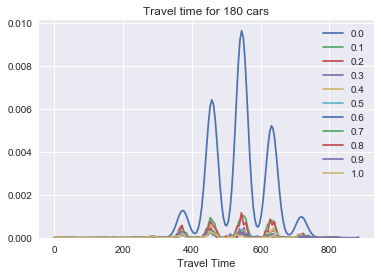

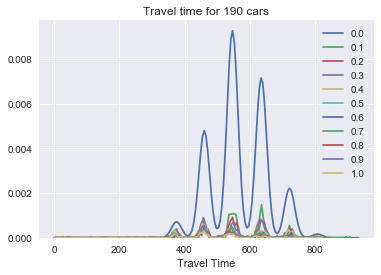

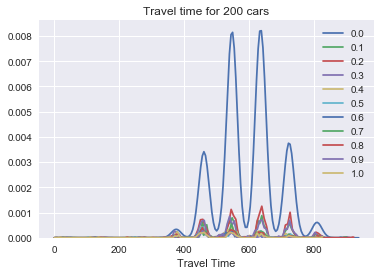

In [3]:
for density in roaddensities:
    for value in asocial_values:
        sns.distplot(data[density][value]['Travel Time'],kde = True, hist=False, norm_hist = False, label = value)
        
    #plt.xlim(0, 1500)
    plt.title('Travel time for %s cars' % (density))
    plt.legend()
    plt.savefig('plots\Traveltime\Traveltimes%s.jpg' % (density))
    plt.show()



Plot Travel Time boxplots per case

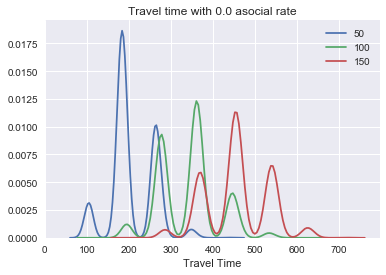

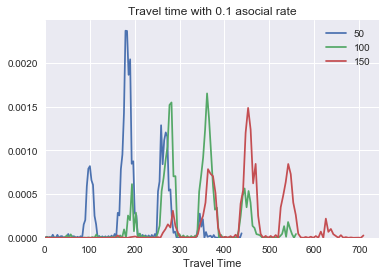

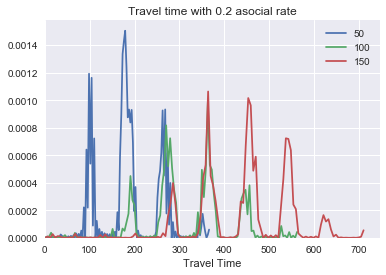

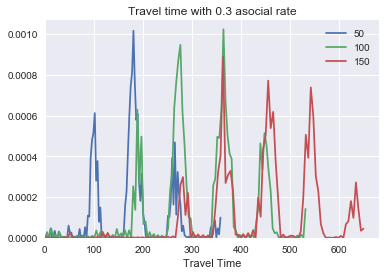

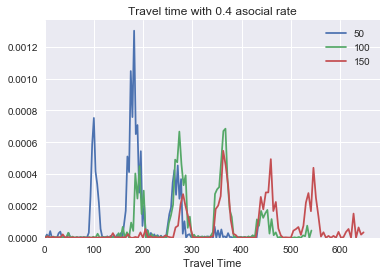

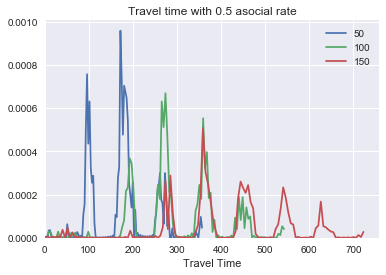

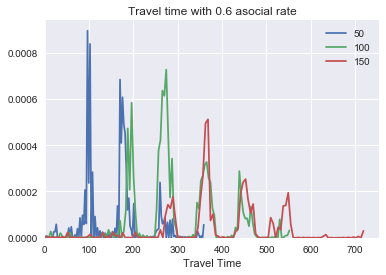

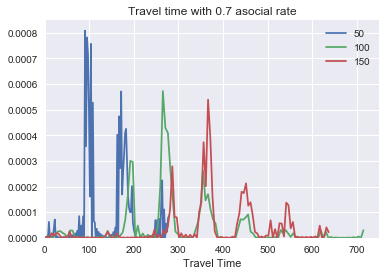

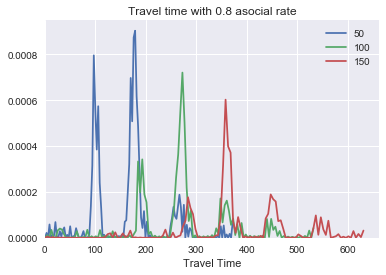

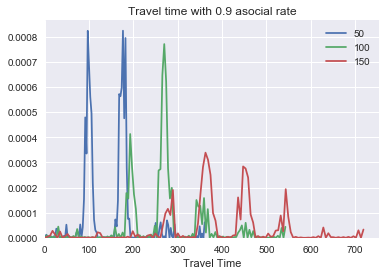

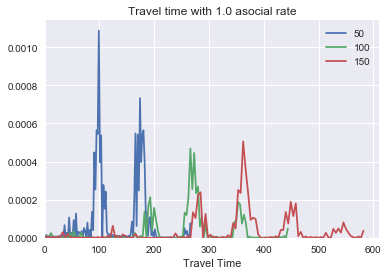

In [4]:
for value in asocial_values:
    sns.distplot(data[50][value]['Travel Time'],kde = True, hist=False, norm_hist = False, label = 50)
    sns.distplot(data[100][value]['Travel Time'],kde = True, hist=False, norm_hist = False, label = 100)
    sns.distplot(data[150][value]['Travel Time'],kde = True, hist=False, norm_hist = False, label = 150)
        
    plt.xlim(xmin=0)
    plt.title('Travel time with %s asocial rate' % (value))
    plt.legend()
    plt.savefig('plots\Traveltime\Asocial%s_3cases.jpg' % (value))
    plt.show()



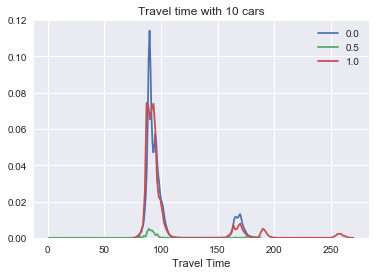

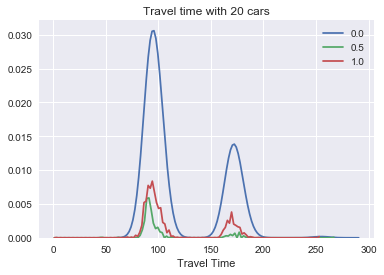

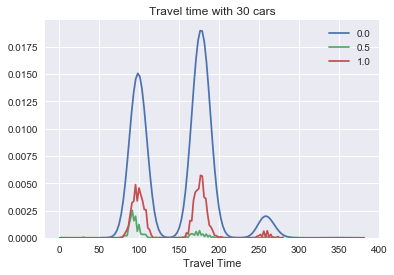

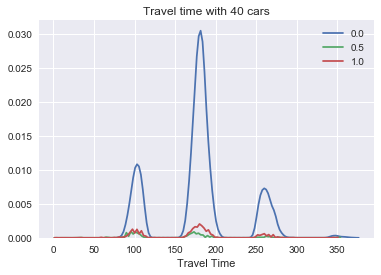

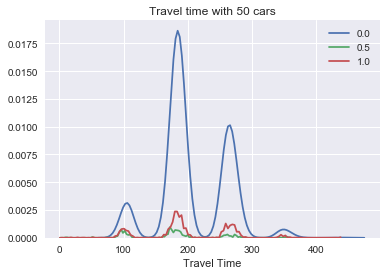

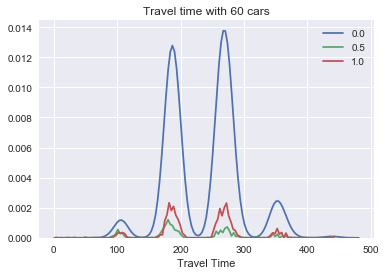

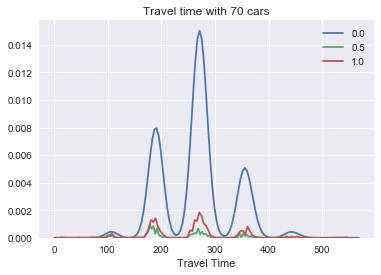

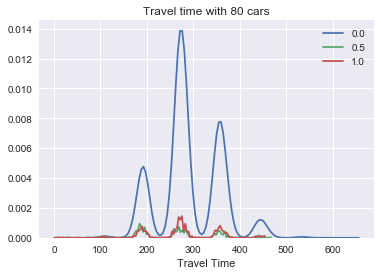

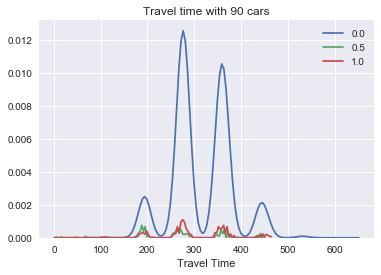

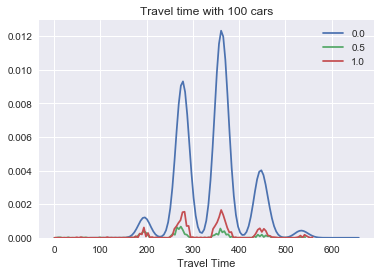

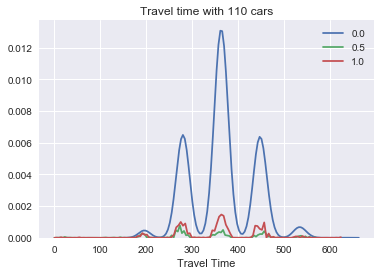

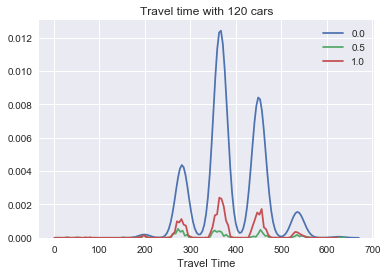

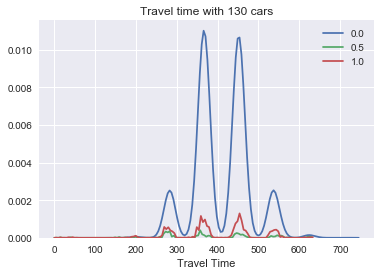

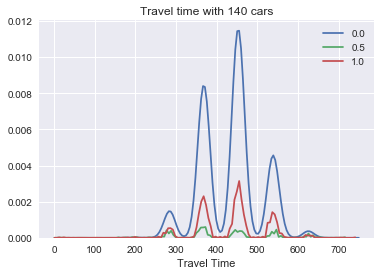

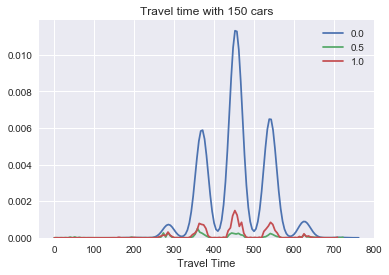

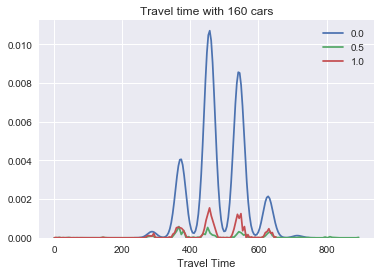

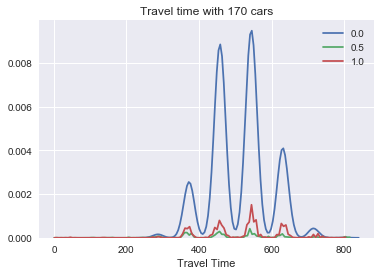

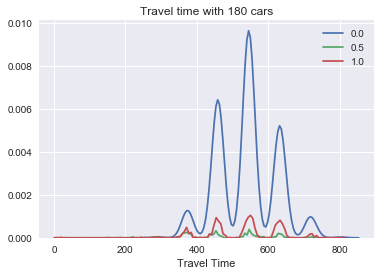

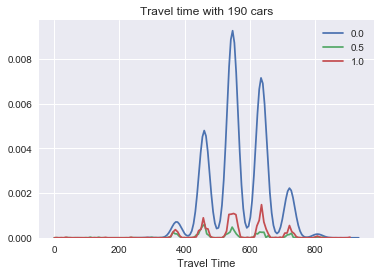

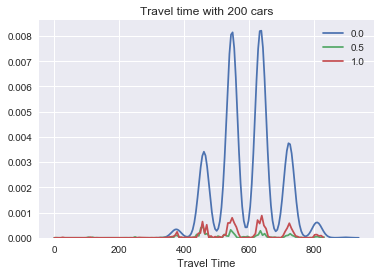

In [5]:
for density in roaddensities:
    sns.distplot(data[density][0.0]['Travel Time'],kde = True, hist=False, norm_hist = False, label = 0.0)
    sns.distplot(data[density][0.5]['Travel Time'],kde = True, hist=False, norm_hist = False, label = 0.5)
    sns.distplot(data[density][0.1]['Travel Time'],kde = True, hist=False, norm_hist = False, label = 1.0)
        
    #plt.xlim(0, 1500)
    plt.title('Travel time with %s cars' % (density))
    plt.legend()
    plt.savefig('plots\Traveltime\Density%s_3cases.jpg' % (density))
    plt.show()



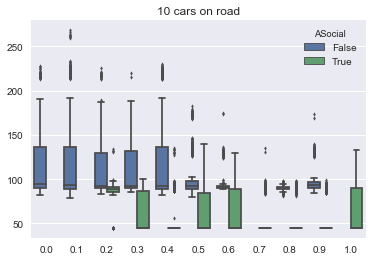

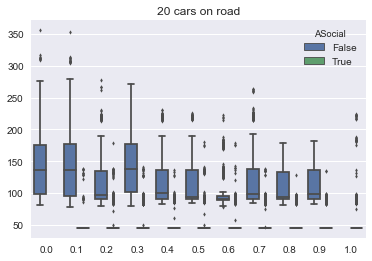

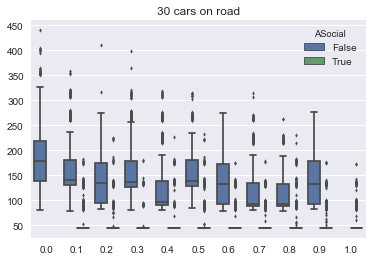

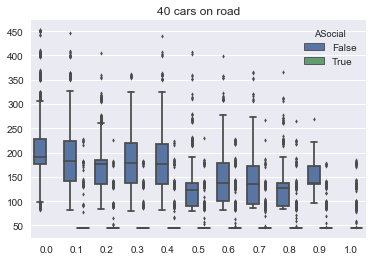

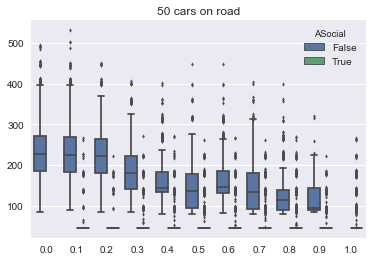

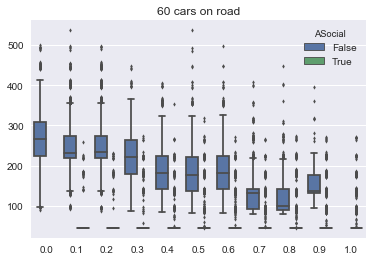

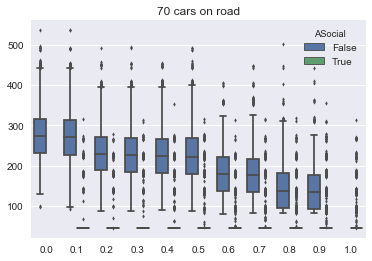

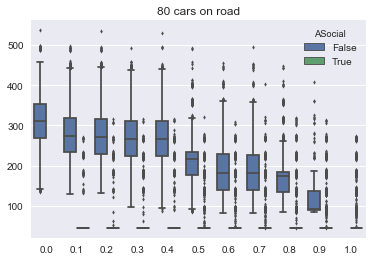

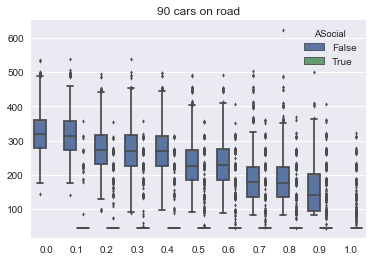

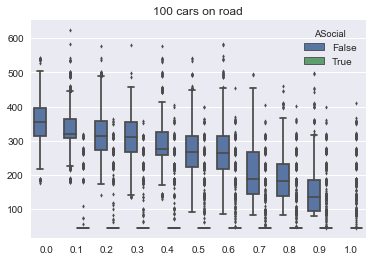

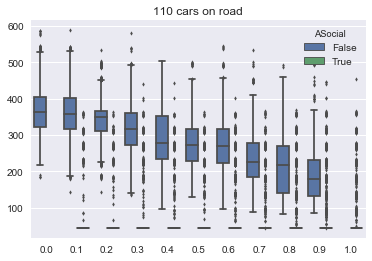

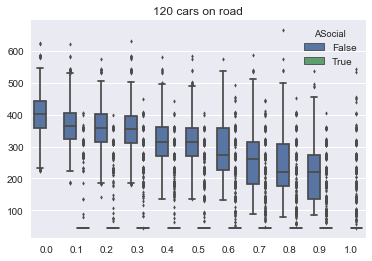

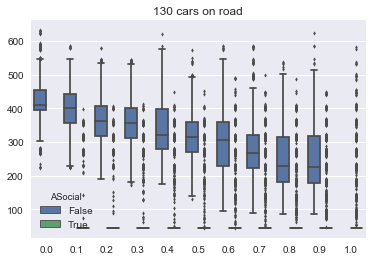

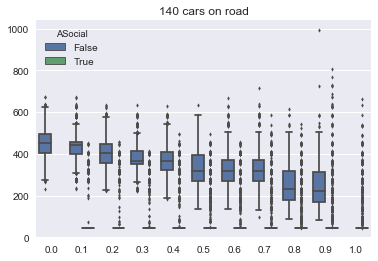

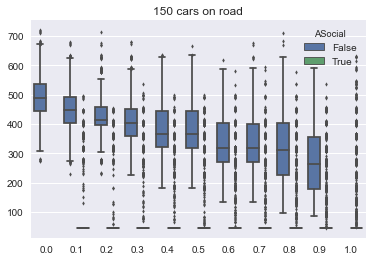

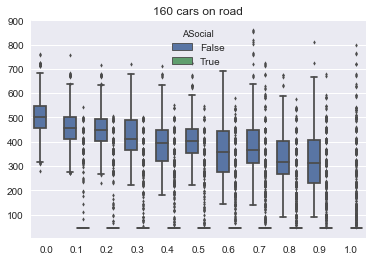

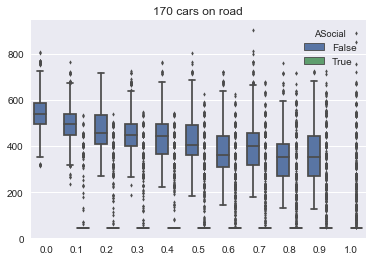

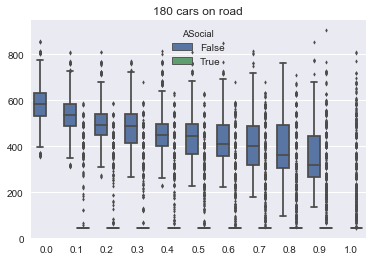

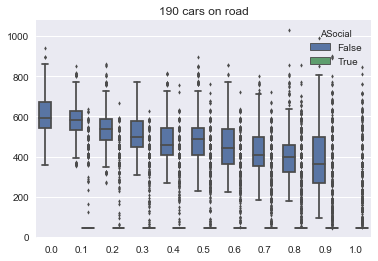

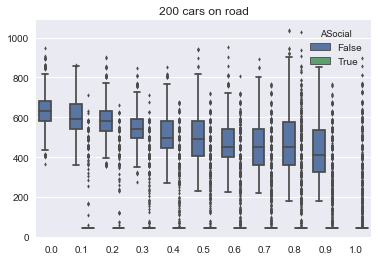

In [8]:
for density in roaddensities:
    sns.boxplot(x = 'ASocial Rate', y = 'Travel Time', hue = 'ASocial', data = pd.concat(data[density]), fliersize = 3)
    plt.title('%s cars on road' % (density))
    plt.xlabel('')#Probability of Selfishness)
    plt.ylabel('')
    #plt.ylim(ymax=2000)
    plt.savefig('plots\Asocialness\TT_boxplot_for_%s_cars.jpg' % (density))
    plt.show()

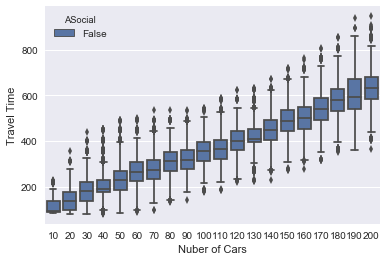

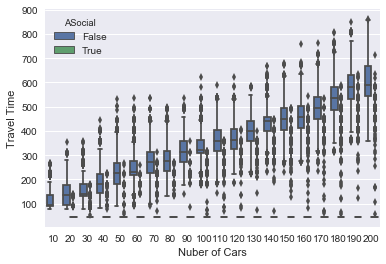

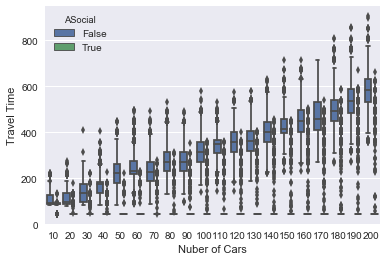

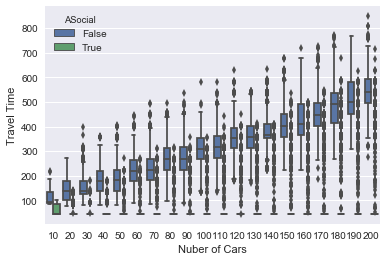

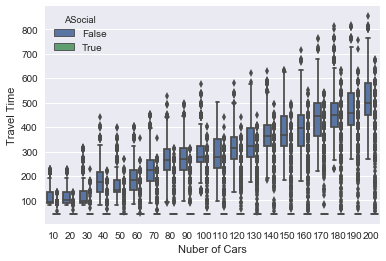

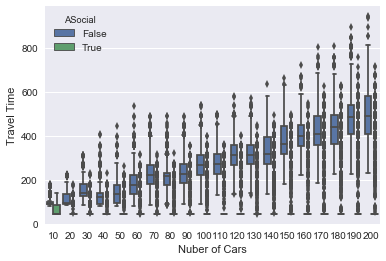

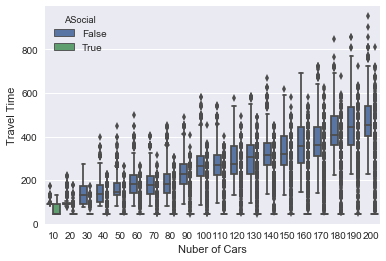

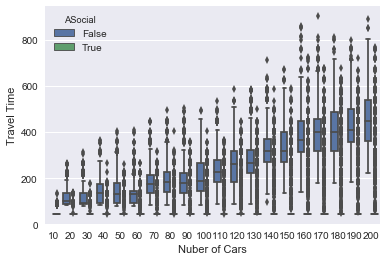

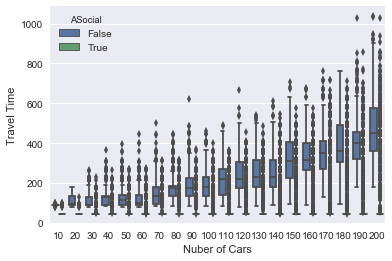

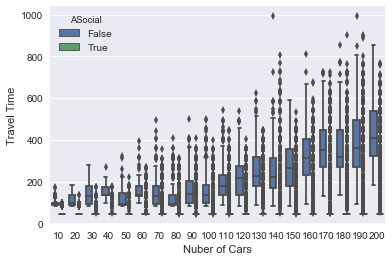

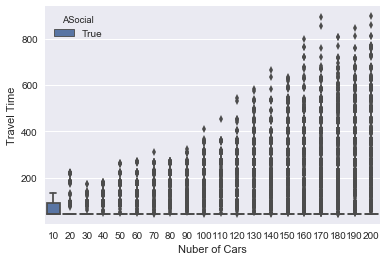

In [9]:
for density in roaddensities:
    for asocialrate in asocial_values:
        data[density][asocialrate]['Density'] = density

for asocialrate in asocial_values:
    databydensity = pd.DataFrame({})
    for density in roaddensities:
        databydensity = pd.concat([databydensity, data[density][asocialrate]])
        
    sns.boxplot(x = 'Density', y = 'Travel Time', hue = 'ASocial', data = databydensity)
    plt.xlabel("Nuber of Cars")
    plt.savefig('plots\Carcount\TT_bocplot_for_%s_asocialness.jpg' % (asocialrate))
    plt.show()
    
        

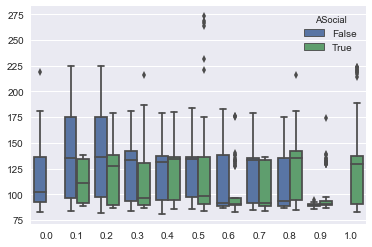

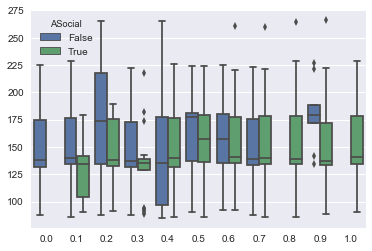

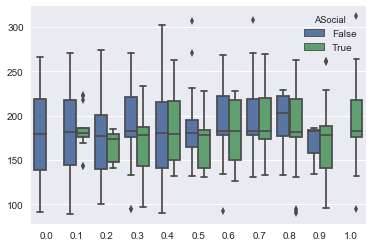

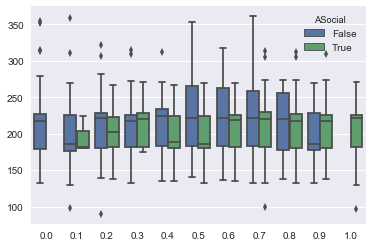

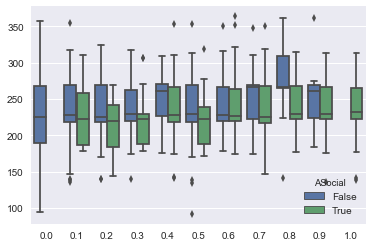

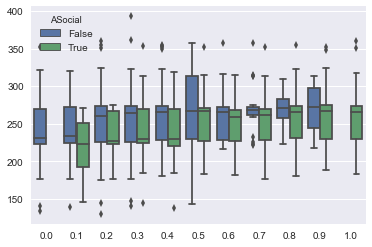

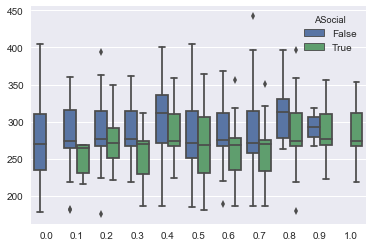

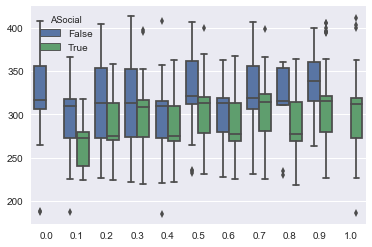

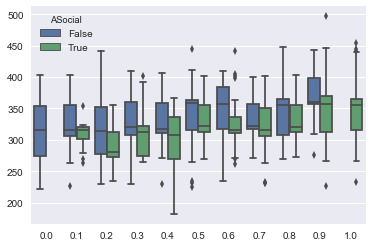

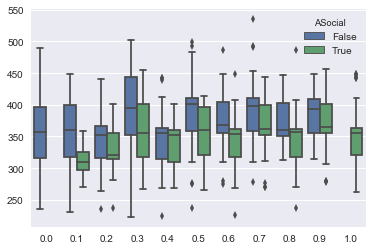

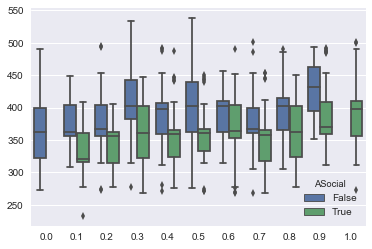

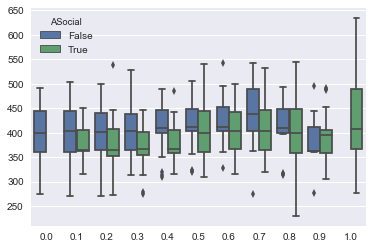

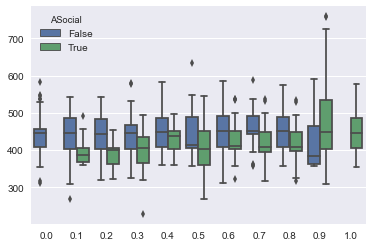

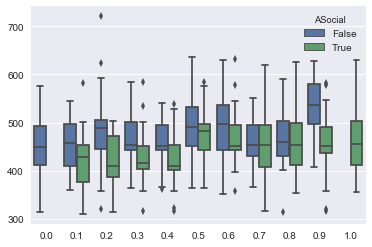

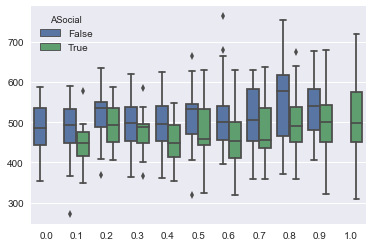

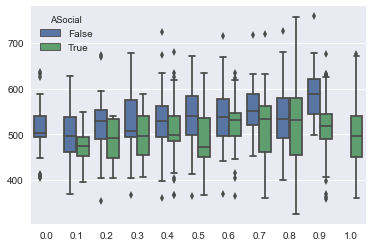

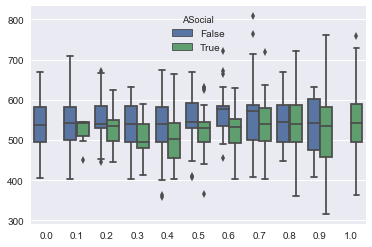

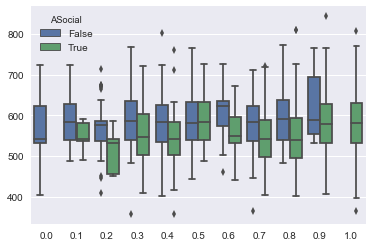

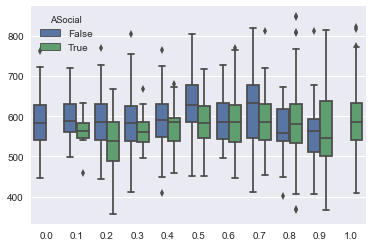

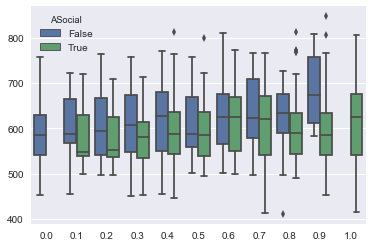

In [11]:
for density in roaddensities:
    sns.boxplot(x = 'ASocial Rate', y = 'Travel Time', hue = 'ASocial', data = pd.concat(data[density], ignore_index = True))
    #plt.title('%s cars on road' % (density))
    plt.xlabel('')#Probability of Selfishness)
    plt.ylabel('')
    #plt.ylim(ymax=900)
    plt.show()

Plot Lane Change counts per case

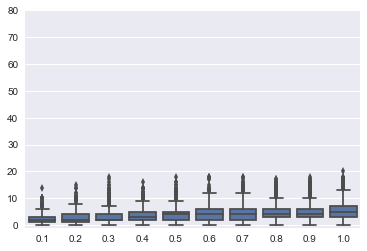

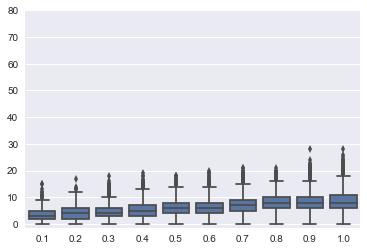

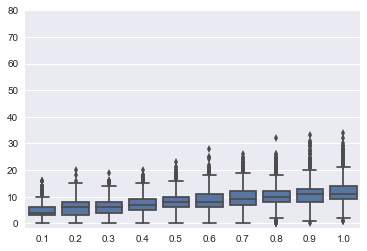

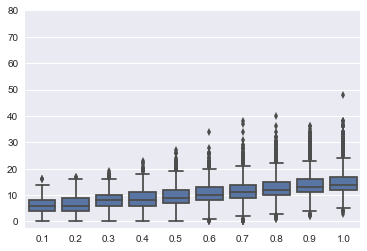

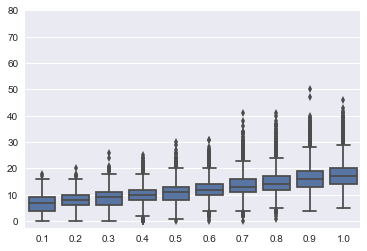

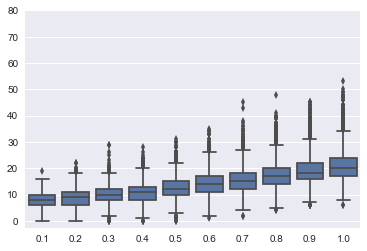

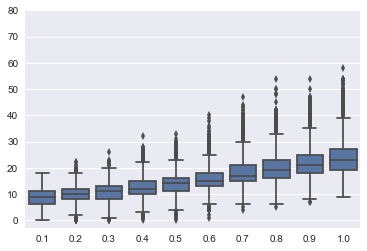

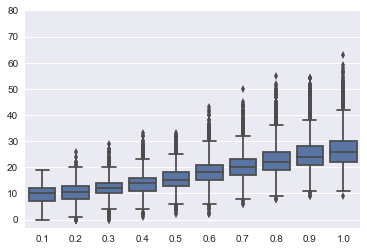

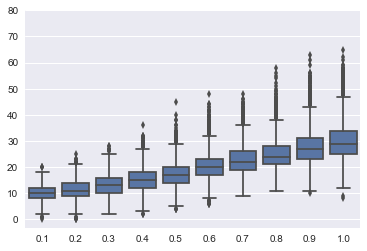

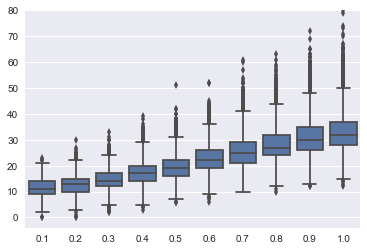

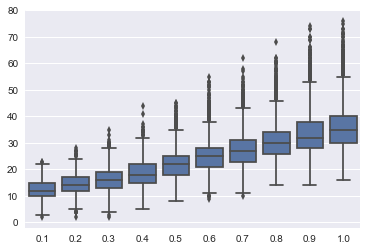

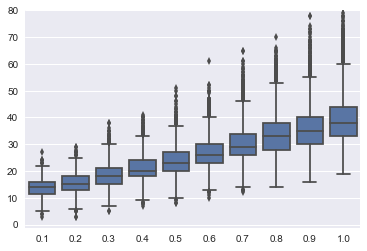

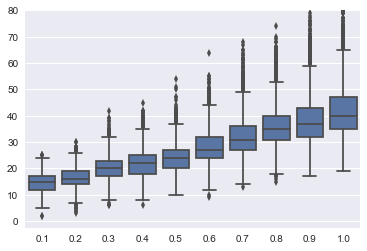

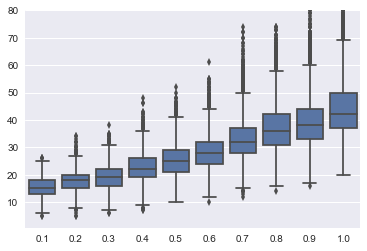

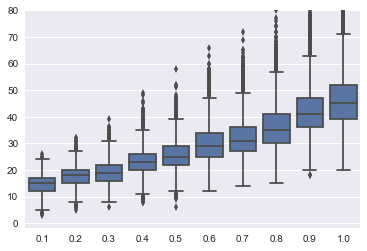

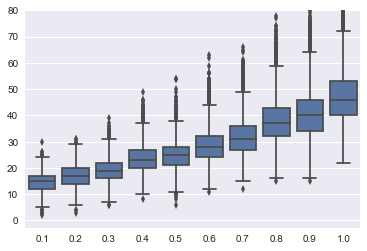

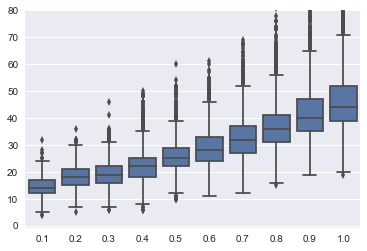

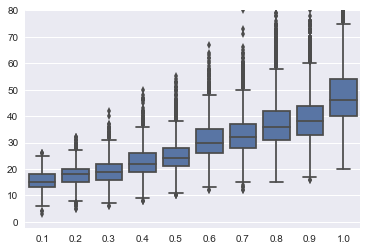

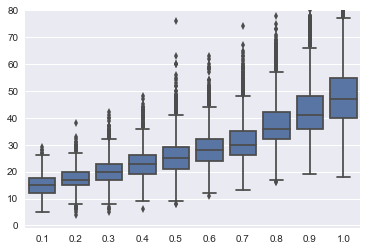

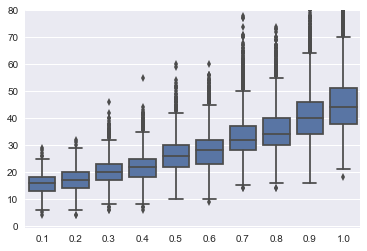

In [9]:
for density in roaddensities:
    alldata = pd.concat(data[density])
    ax = sns.boxplot(x = 'Selfishness', y = 'Lane Changes', hue = 'Selfish', data = alldata[alldata['Selfish']])
    
    ax.legend_.remove()
    
    #plt.title('%s cars on road' % (density))
    plt.xlabel('')#Probability of Selfishness)
    plt.ylabel('')
    plt.ylim(ymax=80)
    plt.savefig('plots\lanechanges_%s_cars_nolabel.jpg' % (density))
    plt.show()